## Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="white")


## Original Data

In [16]:
fertility_rate = pd.read_csv("https://github.com/Zoeyxinyu/QM_-3/blob/main/data/statistic_id284042_total-fertility-rate-in-the-uk-1961-2020.csv?raw=true")
unemployment_rate_female = pd.read_csv("https://github.com/Zoeyxinyu/QM_-3/blob/main/data/statistic_id280236_unemployment-rate-in-the-uk-1971-2021-by-gender.csv?raw=true")
crime_rate = pd.read_csv("https://github.com/Zoeyxinyu/QM_-3/blob/main/data/statistic_id1030625_crime-rate-in-the-united-kingdom-2002-2020.csv?raw=true")
gov_spend_on_edu = pd.read_csv("https://github.com/Zoeyxinyu/QM_-3/blob/main/data/statistic_id298522_government-spending-on-education-in-the-uk-1996-2021.csv?raw=true")
median_hourly_earnings_female = pd.read_csv("https://github.com/Zoeyxinyu/QM_-3/blob/main/data/statistic_id280626_average-full-time-hourly-wage-in-the-uk-1997-2021-by-gender.csv?raw=true")


## Final Data

### Have a look at variables

In [3]:
df = pd.read_csv("https://github.com/Zoeyxinyu/QM_-3/blob/main/data/final_data.csv?raw=true")
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   year                            18 non-null     int64  
 1   fertility_rate                  18 non-null     float64
 2   unemployment_rate_female        18 non-null     float64
 3   crime_rate_per_1000_people      18 non-null     float64
 4   gov_spending_on_edu_per_capita  18 non-null     float64
 5   median_hourly_earnings_female   18 non-null     float64
dtypes: float64(5), int64(1)
memory usage: 992.0 bytes


,year,fertility_rate,unemployment_rate_female,crime_rate_per_1000_people,gov_spending_on_edu_per_capita,median_hourly_earnings_female
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,2010.500000,1.802222,5.339444,86.711111,1485.299444,11.465556
std,5.338539,0.099856,1.232078,14.306226,117.100498,1.560532
min,2002.000000,1.630000,3.650000,68.700000,1297.050000,8.700000
25%,2006.250000,1.745000,4.350000,74.975000,1412.542500,10.300000
50%,2010.500000,1.810000,5.025000,86.400000,1461.320000,11.820000
75%,2014.750000,1.885000,6.290000,97.675000,1563.790000,12.475000
max,2019.000000,1.960000,7.510000,110.100000,1706.520000,13.990000


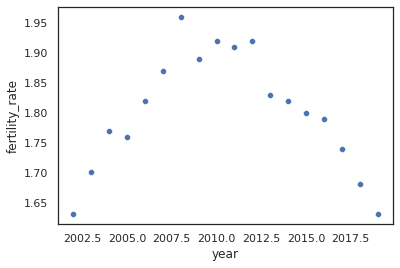

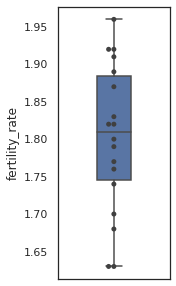

In [4]:
# fertility rate changes
sns.scatterplot(x="year", y="fertility_rate", data=df)
plt.figure(figsize=(2, 5))
ax = sns.boxplot(y=df["fertility_rate"],width=0.3,orient="v")
ax = sns.swarmplot(y="fertility_rate", data=df, color=".25")

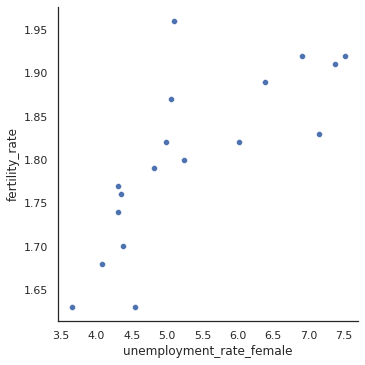

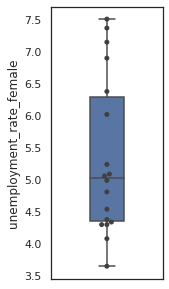

In [5]:
sns.relplot(x="unemployment_rate_female", y="fertility_rate", data=df);
plt.figure(figsize=(2, 5))
ax = sns.boxplot(y=df["unemployment_rate_female"],width=0.3,orient="v")
ax = sns.swarmplot(y="unemployment_rate_female", data=df, color=".25")

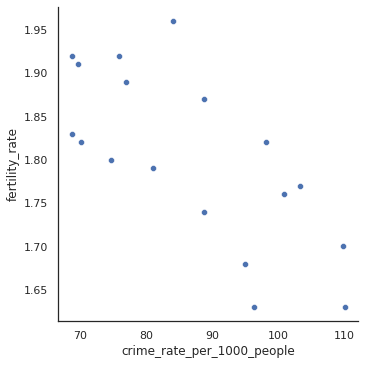

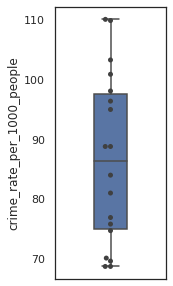

In [6]:
sns.relplot(x="crime_rate_per_1000_people", y="fertility_rate", data=df);
plt.figure(figsize=(2, 5))
ax = sns.boxplot(y=df["crime_rate_per_1000_people"],width=0.3,orient="v")
ax = sns.swarmplot(y="crime_rate_per_1000_people", data=df, color=".25")

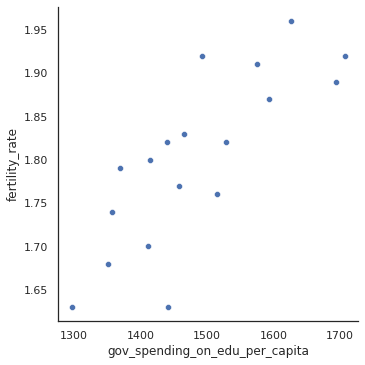

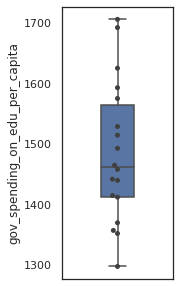

In [7]:
sns.relplot(x="gov_spending_on_edu_per_capita", y="fertility_rate", data=df);
plt.figure(figsize=(2, 5))
ax = sns.boxplot(y=df["gov_spending_on_edu_per_capita"],width=0.3,orient="v")
ax = sns.swarmplot(y="gov_spending_on_edu_per_capita", data=df, color=".25")

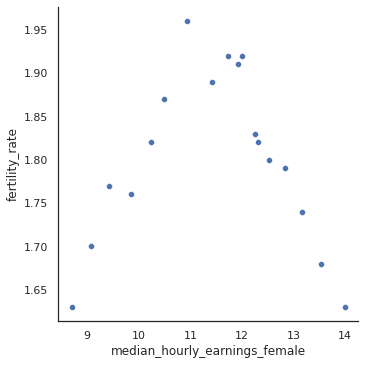

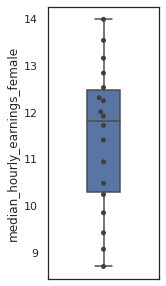

In [8]:
sns.relplot(x="median_hourly_earnings_female", y="fertility_rate", data=df);
plt.figure(figsize=(2, 5))
ax = sns.boxplot(y=df["median_hourly_earnings_female"],width=0.3,orient="v")
ax = sns.swarmplot(y="median_hourly_earnings_female", data=df, color=".25")

## Correlation analysis

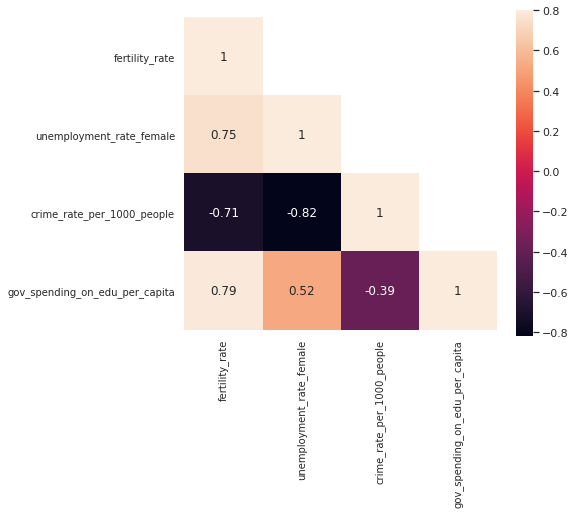

In [9]:
corr = df[['fertility_rate', 'unemployment_rate_female',
       'crime_rate_per_1000_people', 'gov_spending_on_edu_per_capita']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(7,6)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)
ax.tick_params(axis=u'both',which=u'both',labelright=0,labelleft =1,labelbottom=1,top=0,right=0,left=0,bottom=0,labelsize=10)
fig.savefig("corr.png",dpi=300)

## Check multilinearity

In [10]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['unemployment_rate_female',
       'crime_rate_per_1000_people', 'gov_spending_on_edu_per_capita']]
  
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

unemployment_rate_female           53.930928
crime_rate_per_1000_people         49.122138
gov_spending_on_edu_per_capita    169.507053
dtype: float64

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['unemployment_rate_female',
       'crime_rate_per_1000_people']]
  
pd.Series([variance_inflation_factor(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns)

unemployment_rate_female      7.95302
crime_rate_per_1000_people    7.95302
dtype: float64

## Model I

In [12]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pandas as pd
multi_regression_model_1 = smf.ols('fertility_rate ~ unemployment_rate_female + crime_rate_per_1000_people',df).fit()
print(multi_regression_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:         fertility_rate   R-squared:                       0.593
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     10.92
Date:                Tue, 18 Jan 2022   Prob (F-statistic):            0.00118
Time:                        16:36:02   Log-Likelihood:                 24.534
No. Observations:                  18   AIC:                            -43.07
Df Residuals:                      15   BIC:                            -40.40
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/opt/conda/envs/sds2021/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Model II

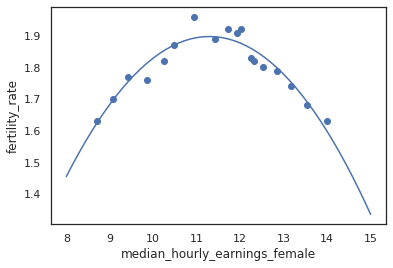

          2
-0.04088 x + 0.9232 x - 3.315


In [13]:
import scipy.stats as stats
x=np.array([8.7,9.07,  9.42 , 9.85, 10.24 ,10.48, 10.94, 11.41, 11.72, 11.92, 12.01, 12.25,12.31,
   12.53, 12.84, 13.16, 13.54, 13.99])
y=np.array([1.63, 1.7,  1.77, 1.76, 1.82, 1.87, 1.96, 1.89, 1.92, 1.91 ,1.92, 1.83, 1.82, 1.8,
 1.79, 1.74, 1.68,1.63])

#polynomial fit with degree = 2
model = np.poly1d(np.polyfit(x,y,2))

#add fitted polynomial line to scatterplot
polyline = np.linspace(8, 15)
plt.scatter(x, y)
plt.xlabel("median_hourly_earnings_female")
plt.ylabel("fertility_rate")
plt.plot(polyline, model(polyline))
plt.show()
print(model)


In [14]:
for i in x:
    y_fit=-0.04088*i*i + 0.9232*i - 3.315
    print(y_fit)

1.6226327999999994
1.6954348879999999
1.753999968
1.8122402000000002
1.8519893120000002
1.870269248
1.8921424319999995
1.8966224719999993
1.8896926080000003
1.8810519680000009
1.8760967119999994
1.8596450000000009
1.8547962319999995
1.8344992080000009
1.799182272
1.7544846719999998
1.6905321920000005
1.5995303120000002


In [15]:
y_fit=np.array([1.62,1.70,1.75,1.81,1.85,1.87,1.89,1.90,1.89,1.88,1.88,1.86,1.85,1.83,1.80,1.75,1.69,1.60])
# residual sum of squares
ss_res = np.sum((y - y_fit) ** 2)

# total sum of squares
ss_tot = np.sum((y - np.mean(y)) ** 2)

# r-squared
r2 = 1 - (ss_res / ss_tot)
print(ss_res,ss_tot,r2)

0.01620000000000001 0.16951111111111117 0.9044310435238594
